In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from pydgrid.plot_bokeh import plot_results
import sympy as sym
import pydae.build as db
import pydae.build_cffi as db

from pydae.grid_urisi import unb_ri_si
import json
import networkx as nx
import time

In [2]:
grid = unb_ri_si('cigre_eu_lv_acdc.json')
grid_opt = unb_ri_si('cigre_eu_lv_acdc_opt.json')

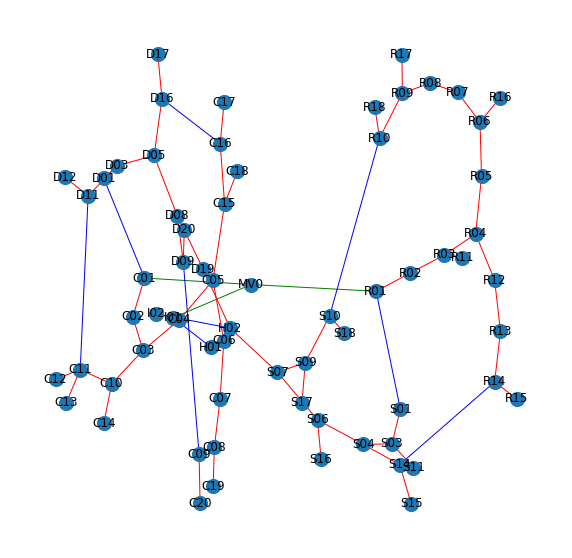

In [3]:
with open('cigre_eu_lv_acdc.json','r') as fobj:
    data = json.loads(fobj.read().replace("'",'"'))
    
G = nx.Graph()

for bus in data['buses']:
    G.add_node(bus['bus'])  # default edge data=1
    
for line in data['lines']:
    G.add_edge(line['bus_j'], line['bus_k'],color='r',weight=10)  # default edge data=1
for trafo in data['transformers']:
    G.add_edge(trafo['bus_j'], trafo['bus_k'],color='g')  # default edge data=1
for vsc in data['vscs']:
    G.add_edge(vsc['bus_ac'], vsc['bus_dc'],color='b')  # default edge data=1
        
colors = nx.get_edge_attributes(G,'color').values()
        
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10),sharex=True)

nx.draw(G,pos=nx.spring_layout(G),node_size=200, edge_color=colors,with_labels=True)   # default spring_layout
#subax2 = plt.subplot(122)
#nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

In [4]:
nx.is_connected(G)
colors = nx.get_edge_attributes(G,'color').values()
colors

dict_values(['g', 'g', 'g', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'b', 'r', 'b', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r'])

In [5]:

params_dict  = grid.dae['params']
f_list = grid.dae['f']
x_list = grid.dae['x']
g_list = grid.dae['g'] 
y_list = grid.dae['y'] 
u_dict = grid.dae['u']


h_dict = grid.dae['h_dict']
h_dict.update(grid.dae['h_v_m_dict'])

p_total = grid_opt.dae['h_dict']['p_t_MV0_R01_1'] + grid_opt.dae['h_dict']['p_t_MV0_I01_1'] + grid_opt.dae['h_dict']['p_t_MV0_C01_1']
h_dict.update({'p_total':sym.simplify(p_total)})

i_res = (grid_opt.dae['h_dict']['i_t_MV0_R01_2_a_r']**2 +  grid_opt.dae['h_dict']['i_t_MV0_R01_2_a_i']**2)**0.5
i_ind = (grid_opt.dae['h_dict']['i_t_MV0_I01_2_a_r']**2 +  grid_opt.dae['h_dict']['i_t_MV0_I01_2_a_i']**2)**0.5
i_com = (grid_opt.dae['h_dict']['i_t_MV0_C01_2_a_r']**2 +  grid_opt.dae['h_dict']['i_t_MV0_C01_2_a_i']**2)**0.5

h_dict.update({'i_res':sym.simplify(i_res)})
h_dict.update({'i_ind':sym.simplify(i_ind)})
h_dict.update({'i_com':sym.simplify(i_com)})

u_dummy,x_dummy,z_dummy = sym.symbols('u_dummy,x_dummy,z_dummy', real=True)
u_dict.update({'u_dummy':0})
#grid.dae['xy_0_dict'].update(xy_0_dict_vsc)
f_list = [u_dummy - x_dummy]
x_list = [x_dummy]

h_dict.update({'z_dummy':x_dummy})

sys_dict = {'name':'cigre_eu_lv_acdc','uz_jacs':True,
           'params_dict':params_dict,
           'f_list':f_list,
           'g_list':g_list,
           'x_list':x_list,
           'y_ini_list':y_list,
           'y_run_list':y_list,
           'u_run_dict':u_dict,
           'u_ini_dict':u_dict,
           'h_dict':h_dict
           }

bldr = db.builder(sys_dict);
bldr.build()


Compilation time: 489.66 s


In [3]:
params_dict  = grid_opt.dae['params']
f_list = grid_opt.dae['f']
x_list = grid_opt.dae['x']
g_list = grid_opt.dae['g'] 
y_list = grid_opt.dae['y'] 
u_dict = grid_opt.dae['u']


h_dict = grid_opt.dae['h_dict']
h_dict.update(grid_opt.dae['h_v_m_dict'])

p_total = grid_opt.dae['h_dict']['p_t_MV0_R01_1'] + grid_opt.dae['h_dict']['p_t_MV0_I01_1'] + grid_opt.dae['h_dict']['p_t_MV0_C01_1']
h_dict.update({'p_total':sym.simplify(p_total)})

i_res = (grid_opt.dae['h_dict']['i_t_MV0_R01_2_a_r']**2 +  grid_opt.dae['h_dict']['i_t_MV0_R01_2_a_i']**2)**0.5
i_ind = (grid_opt.dae['h_dict']['i_t_MV0_I01_2_a_r']**2 +  grid_opt.dae['h_dict']['i_t_MV0_I01_2_a_i']**2)**0.5
i_com = (grid_opt.dae['h_dict']['i_t_MV0_C01_2_a_r']**2 +  grid_opt.dae['h_dict']['i_t_MV0_C01_2_a_i']**2)**0.5

h_dict.update({'i_res':sym.simplify(i_res)})
h_dict.update({'i_ind':sym.simplify(i_ind)})
h_dict.update({'i_com':sym.simplify(i_com)})



u_dummy,x_dummy,z_dummy = sym.symbols('u_dummy,x_dummy,z_dummy', real=True)
u_dict.update({'u_dummy':0})
#grid.dae['xy_0_dict'].update(xy_0_dict_vsc)
f_list = [u_dummy - x_dummy]
x_list = [x_dummy]

h_dict.update({'z_dummy':x_dummy})


sys_dict = {'name':'cigre_eu_lv_acdc_opt','uz_jacs':True,
           'params_dict':params_dict,
           'f_list':f_list,
           'g_list':g_list,
           'x_list':x_list,
           'y_ini_list':y_list,
           'y_run_list':y_list,
           'u_run_dict':u_dict,
           'u_ini_dict':u_dict,
           'h_dict':h_dict
           }

bldr = db.builder(sys_dict);
bldr.build()

Compilation time: 423.41 s


In [7]:
data_input = 'cigre_eu_lv_acdc.json'
data_input = open(data_input).read().replace("'",'"')
data = json.loads(data_input)
buses = data['buses']


xy_0_dict = {}
for bus in buses:
    # {"bus": "S01",  "pos_x":   4, "pos_y":    0, "units": "m", "U_kV":0.8, "acdc":"DC"},

    acdc = 'AC'
    if 'acdc' in bus:
        if bus['acdc'] == 'DC':
            acdc = 'DC'
    
    bus_name = bus['bus']
    U_nom = bus['U_kV']*1000
    if acdc == 'AC':
        if U_nom>1e3:
            delta = np.deg2rad(0)
        else:
            delta = np.deg2rad(30)

        v_a = U_nom/np.sqrt(3)*np.exp(1j*(-0/3*np.pi+delta))
        v_b = U_nom/np.sqrt(3)*np.exp(1j*(-2/3*np.pi+delta))
        v_c = U_nom/np.sqrt(3)*np.exp(1j*(-4/3*np.pi+delta))
        v_n = 0.1 +1j*0.0
        
        xy_0_dict.update({f'v_{bus_name}_a_r':v_a.real,f'v_{bus_name}_a_i':v_a.imag})
        xy_0_dict.update({f'v_{bus_name}_b_r':v_b.real,f'v_{bus_name}_b_i':v_b.imag})
        xy_0_dict.update({f'v_{bus_name}_c_r':v_c.real,f'v_{bus_name}_c_i':v_c.imag})
        
        if U_nom<1e3:
            xy_0_dict.update({f'v_{bus_name}_n_r':v_n.real,f'v_{bus_name}_n_i':v_n.imag})

    if acdc == 'DC':
        v_a = U_nom
        v_b = 0.1
        v_c = 0.1
        v_n = 0.1 +1j*0.0
        
        xy_0_dict.update({f'v_{bus_name}_a_r':v_a.real,f'v_{bus_name}_a_i':v_a.imag})
        xy_0_dict.update({f'v_{bus_name}_b_r':v_b.real,f'v_{bus_name}_b_i':v_b.imag})
        xy_0_dict.update({f'v_{bus_name}_c_r':v_c.real,f'v_{bus_name}_c_i':v_c.imag})
        xy_0_dict.update({f'v_{bus_name}_n_r':v_n.real,f'v_{bus_name}_n_i':v_n.imag})

        
data = json.dumps(xy_0_dict, indent=4)
fobj = open("xy_0.json","w")
fobj.write(data)
fobj.close()         

## Experimental initial conditions

In [12]:
delta = np.deg2rad(30)
for item in grid.dae['xy_0_dict']:
    ph = item.split('_')[2]
    ir = item.split('_')[3]
    if ph == 'a':
        v = 400.0/np.sqrt(3)*np.exp(1j*0.0+delta)
        if ir == 'r':
            grid.dae['xy_0_dict'][item] = v.real
        if ir == 'i':
            grid.dae['xy_0_dict'][item] = v.imag
    if ph == 'b':
        v = 400.0/np.sqrt(3)*np.exp(1j*(-2/3*np.pi+delta))
        if ir == 'r':
            grid.dae['xy_0_dict'][item] = v.real
        if ir == 'i':
            grid.dae['xy_0_dict'][item] = v.imag  
    if ph == 'c':
        v = 400.0/np.sqrt(3)*np.exp(1j*(-4/3*np.pi+delta))
        if ir == 'r':
            grid.dae['xy_0_dict'][item] = v.real
        if ir == 'i':
            grid.dae['xy_0_dict'][item] = v.imag 

data = json.dumps(grid.dae['xy_0_dict'], indent=4)
fobj = open("xy_0_2.json","w")
fobj.write(data)
fobj.close()            

In [16]:
grid.dae['xy_0_dict']

{'v_R01_a_r': 389.8481008958138,
 'v_R01_a_i': 0.0,
 'v_R01_b_r': 1.414100318299876e-14,
 'v_R01_b_i': -230.94010767585033,
 'v_R01_c_r': -200.00000000000006,
 'v_R01_c_i': 115.4700538379251,
 'v_R01_n_r': -0.10316548477567267,
 'v_R01_n_i': 0.47700924093442154,
 'v_R11_a_r': 389.8481008958138,
 'v_R11_a_i': 0.0,
 'v_R11_b_r': 1.414100318299876e-14,
 'v_R11_b_i': -230.94010767585033,
 'v_R11_c_r': -200.00000000000006,
 'v_R11_c_i': 115.4700538379251,
 'v_R11_n_r': 0.010208564577624202,
 'v_R11_n_i': -0.05598363854733179,
 'v_R15_a_r': 389.8481008958138,
 'v_R15_a_i': 0.0,
 'v_R15_b_r': 1.414100318299876e-14,
 'v_R15_b_i': -230.94010767585033,
 'v_R15_c_r': -200.00000000000006,
 'v_R15_c_i': 115.4700538379251,
 'v_R15_n_r': 0.1471493661556451,
 'v_R15_n_i': -0.6097678588048439,
 'v_R16_a_r': 389.8481008958138,
 'v_R16_a_i': 0.0,
 'v_R16_b_r': 1.414100318299876e-14,
 'v_R16_b_i': -230.94010767585033,
 'v_R16_c_r': -200.00000000000006,
 'v_R16_c_i': 115.4700538379251,
 'v_R16_n_r': 0.1504

In [ ]:
import pydgrid

In [ ]:
grid = pydgrid.grid()
grid.read('cigre_eu_lv.json')
grid.pf()
grid.buses

In [ ]:
grid = unb_ri_si('cigre_eu_lv_reduced.json')

params_dict  = grid.dae['params']
f_list = grid.dae['f']
x_list = grid.dae['x']
g_list = grid.dae['g'] 
y_list = grid.dae['y'] 
u_dict = grid.dae['u']


h_dict = grid.dae['h_dict']
h_dict.update(grid.dae['h_v_m_dict'])

sys_dict = {'name':'cigre_eu_lv_reduced',
           'params_dict':params_dict,
           'f_list':f_list,
           'g_list':g_list,
           'x_list':x_list,
           'y_ini_list':y_list,
           'y_run_list':y_list,
           'u_run_dict':u_dict,
           'u_ini_dict':u_dict,
           'h_dict':h_dict
           }

db.build(sys_dict,verbose=True)

In [ ]:
with open('cigre_eu_lv_acdc.json','r') as fobj:
    data = json.loads(fobj.read().replace("'",'"'))

In [ ]:
data

In [34]:
G_s.edges.data()

EdgeDataView([('Supernode-0', 'Supernode-1', {'types': [{'type': 'Strong'}]}), ('Supernode-1', 'Supernode-2', {'types': [{'type': 'Weak'}]})])

In [18]:
150/690

0.21739130434782608